In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train = pd.read_csv('/content/drive/My Drive/DL Projects/Auto-encoder CNN/train.csv')

In [0]:
test = pd.read_csv('/content/drive/My Drive/DL Projects/Auto-encoder CNN/test.csv')

In [0]:
train_X = train.drop(labels = 'label', axis = 1)

In [5]:
train_X.shape

(42000, 784)

In [0]:
train_X = train_X.values
test_X = test.values

In [52]:
train_X.shape

(42000, 784)

In [0]:
train_X = train_X / 255.0
test_X = test_X / 255.0

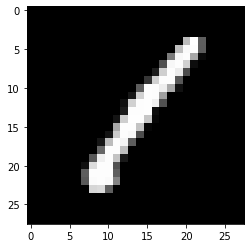

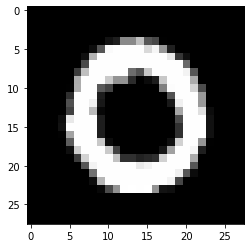

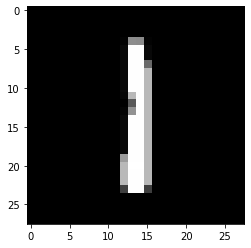

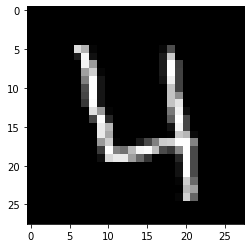

In [8]:
for i,_ in enumerate(train_X[:4]):
    plt.imshow(train_X[i].reshape((28,28)))
    plt.gray()
    plt.show()

In [0]:
from tensorflow.keras.layers import  Input, Dense, MaxPooling2D, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

In [13]:
autoencoder = Sequential()

autoencoder.add(Dense(512, activation='elu', input_shape = (784,)))
autoencoder.add(Dense(128,activation='elu'))
autoencoder.add(Dense(10,activation='linear', name = 'bottleneck'))
autoencoder.add(Dense(128,activation='elu'))
autoencoder.add(Dense(512,activation='elu'))
autoencoder.add(Dense(784,activation='sigmoid'))

autoencoder.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['mse'])

trained_model = autoencoder.fit(train_X, train_X, batch_size = 128, epochs = 10)

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 0.0401 - mse: 0.0402
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0227 - mse: 0.0227
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0198 - mse: 0.0198
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0181 - mse: 0.0181
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0170 - mse: 0.0170
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0161 - mse: 0.0161
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0154 - mse: 0.0155
Epoch 8/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0149 - mse: 0.0149
Epoch 9/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0144 - mse: 0.0144
Epoch 10/10
329/329 [==============================] - 1s 3ms/step - loss: 0.0140 - mse: 0.0140


In [0]:
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)

In [0]:
encoded_data = encoder.predict(train_X)

In [0]:
decoded_output = autoencoder.predict(train_X)

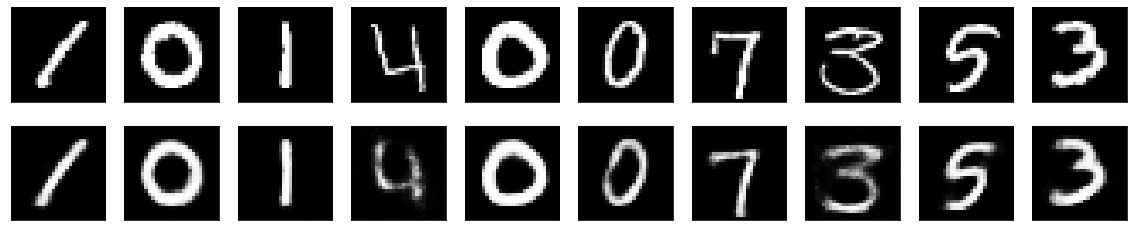

In [92]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_X[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_output[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.preprocessing import image

In [0]:
imgs = autoencoder.predict(test_X)

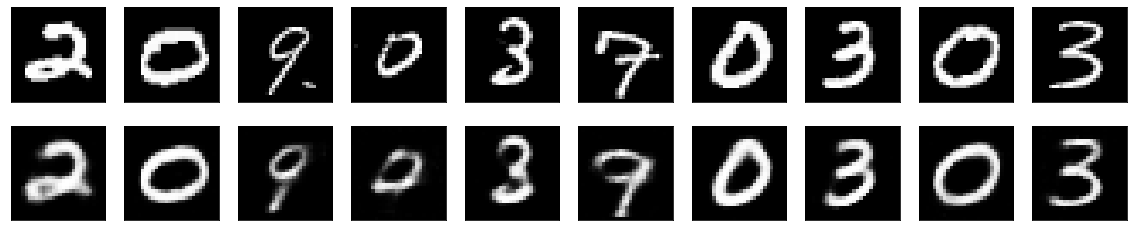

In [78]:
n = 10

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(imgs[i].reshape(28, 28))
    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from skimage import  io

In [0]:
own_img = io.imread('pred.png')

In [0]:
own_img = image.img_to_array(own_img)

In [0]:
own_img = own_img / 255.0

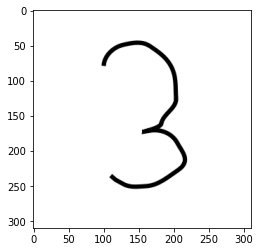

In [36]:
plt.imshow(own_img)

In [38]:
own_img.shape

(310, 310, 4)

In [0]:
own_img = np.resize(1,784)

In [56]:
own_img = own_img.reshape(1,-1)
own_img.shape

(1, 784)

In [0]:
own_pred = autoencoder.predict(own_img)

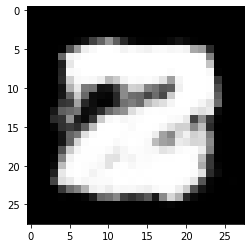

In [58]:
plt.imshow(own_pred.reshape(28,28))

In [62]:
from keras.preprocessing import image
# if the img.png is not one of the MNIST dataset that the model was trained on, the error will be very high.
img = image.load_img("./pred.png", target_size=(28, 28), color_mode = "grayscale")
input_img = image.img_to_array(img)
inputs = input_img.reshape(1,784)
target_data = autoencoder.predict(inputs)
dist = np.linalg.norm(inputs - target_data, axis=-1)
print(dist)

[7000.201]
